# GOOD BEER PROJECT #
* This file only contains IDA on data. If your looking for EDA check the "Good Beer Project EDA File"
* All data used for this project can be found online at Kaggel.com
* The goal of this file is to organize the public information found online into a single data file to be used for EDA.

## Load in packages and data set ##

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy.stats import gaussian_kde

# Load in beer rank data as dfbr
# Load CSV Desktop
file_path_main = r'C:\Users\jrruh\OneDrive\Documents\Homework\Data Sciance\CSME 830\Project 1\Beer flavor profiles\beer_data_set.csv'

# Load CSV Laptop
# file_path_main = r'C:\Users\jackz\Documents\Homework\Data Sciance\830\Project 1\Beer flavor profiles\beer_data_set.csv'

dfbr = pd.read_csv(file_path_main)
# dfbr
# features = Name, key, Style, Style Key, Brewery, Description, ABV, Ave Rating, Min IBU, Max IBU, Astringency, Body, Alcohol, Bitter, Sweet, Sour, Salty, Fruits, Hoppy, Spices, Malty

# Looking closer at the data, there is missing data but its not listed as Na but rather as a 0. This is not ideal as a 0 can mean an absence of flavor or missing data. my approach will be if data all columns in flavors is listed as 0 then I will drop it later.

# load in homebrew beer data as dfbf
file_path_main = r'C:\Users\jrruh\OneDrive\Documents\Homework\Data Sciance\CSME 830\Project 1\archive\recipeData.csv' # Desktop
# file_path_main = r'C:\Users\jackz\Documents\Homework\Data Sciance\830\Project 1\archive\recipeData.csv' # laptop
dfbf = pd.read_csv(file_path_main, encoding='ISO-8859-1')

## Initial data exploration ##

### Beer rank data ###
* Beer rank contains over 5000 different commercial beers all ranked by the website Brewers Advocate.
* Columns contain information such as...
1. Commercial Beer name
2. Index key
3. Beer Style name
4. Beer Style key (Provided Encoded beer style)
5. Brewery/Manufacturer
6. Description of the beers property's
7. Alcohol by volume (ABV)
8. Average rating
9. MIN and MAX IBUs or international bitterness units. Values are given estimations and counted in intervals of 5.
10. Astringency (how harsh is the beers flavor, kind of like a sour or bitter puckering feeling)
11. Body (often described as a thickness or viscosity)
12. Alcohol (how much of the alcohol can you taste, not a measurement of alcohol itself)
13. Bitter
14. Sweet
15. Sour
16. Salty (yes salty beer exists but its uncommon)
17. Fruits (can be broken down further into different fruit flavors but the data has group all fruit flavors into one category)
18. Hoppy (hoppy is also described as tasting like pine needles or herbs)
19. Spices (warm flavors)
20. Malty (very similar to sweetness but more of a grain taste)

In [93]:
dfbr.info()
dfbr.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5556 non-null   object 
 1   key          5558 non-null   int64  
 2   Style        5558 non-null   object 
 3   Style Key    5558 non-null   int64  
 4   Brewery      5558 non-null   object 
 5   Description  5558 non-null   object 
 6   ABV          5558 non-null   float64
 7   Ave Rating   5558 non-null   float64
 8   Min IBU      5558 non-null   int64  
 9   Max IBU      5558 non-null   int64  
 10  Astringency  5558 non-null   int64  
 11  Body         5558 non-null   int64  
 12  Alcohol      5558 non-null   int64  
 13  Bitter       5558 non-null   int64  
 14  Sweet        5558 non-null   int64  
 15  Sour         5558 non-null   int64  
 16  Salty        5558 non-null   int64  
 17  Fruits       5558 non-null   int64  
 18  Hoppy        5558 non-null   int64  
 19  Spices

,key,Style Key,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
count,5558.000000,5558.000000,5558.00000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000,5558.000000
mean,2779.500000,64.449082,6.63373,3.760239,20.715545,38.452321,15.938647,42.746132,15.975171,34.316121,53.629723,34.610291,1.314142,39.378553,38.414538,17.584023,68.591400
std,1604.600729,35.814930,2.52166,0.442951,13.736873,22.184524,11.624254,28.589959,18.268342,27.118100,35.866101,39.850228,3.874110,36.652293,31.912843,23.973879,44.600385
min,1.000000,2.000000,0.00000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1390.250000,34.000000,5.00000,3.590000,10.000000,25.000000,8.000000,25.000000,5.000000,13.000000,27.000000,9.000000,0.000000,10.000000,14.000000,4.000000,33.000000
50%,2779.500000,64.000000,6.00000,3.820000,20.000000,35.000000,14.000000,38.000000,10.000000,29.000000,49.500000,21.000000,0.000000,28.000000,30.000000,9.000000,65.000000
75%,4168.750000,95.000000,7.90000,4.040000,25.000000,45.000000,22.000000,55.000000,20.000000,51.000000,74.000000,44.000000,1.000000,61.750000,56.000000,22.000000,99.000000
max,5558.000000,126.000000,57.50000,4.830000,65.000000,100.000000,83.000000,197.000000,139.000000,150.000000,263.000000,323.000000,66.000000,222.000000,193.000000,184.000000,304.000000


In [94]:
dfbr.head()

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,...,55,31,47,101,18,1,49,40,16,119
4,Scurry,255,Altbier,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,...,69,10,63,120,14,0,19,36,15,218


### Homebrew data ###
The data below contains 73861 beer recipes from the website "Brewers Friend". "Brewers Friend" is a website where home brewers can upload there recipes to the internet for others to see, use, and rate. I myself have used "Brewers Friend" to make a few batches of beer so I understand more or less what each column in the data set mean.

Columns
1. BeerID: nominal data, its just a unique number given to a recipe
2. StyleID: Needs to be decoded from the styleID df. the data is categorical and represents the brewing style of the beer. some common styles are light lager, IPA, and wheat beer. There are 176 styles in total.
3. size(L): This is the batch size of the brew. it is ratio data, but is unlikely to be useful later on. L = liters
4. OG: OG dose not mean "original gangster" in this data context. OG means Original gravity. OG is ratio data collected from the "wart" buoyancy. "wart" is unfermented cooked beer.
5. FG: FG stands for final gravity. final gravity is ratio data collected from the beer buoyancy. Its the same measurement as OG but taken at a different point in time.
6. ABV: ABV is alcohol by volume. The ABV is the value of the ((OG-FG) * 131.25)
7. IBU: IBU stand for international bitterness unit. IBU is an equation that estimates the alpha-acid content of a brew. Alpha-acids are produced by boiling hops and make the beer more bitter.
8. Color: Bigger number darker beer. Ordinal data. Color is usually an indicator of flavor and mouthfeel AKA how thick is the beer.
9. BoilSize: Impotent to know for IBU calculation. tells you the volume of the starting boil/wart
10. BoilGravity: Not too impotent to know but its another IBU calculation indicator. Its the buoyancy of the boiling wart.
11. Efficiency: Efficiency is a value that tells you how much alpha-acids you will pull from a boil. Its often used for IBU calculation
12. MashThickness: This one is complicated to explain. Mash is a term used to describe a complicated possess known as malting which produces mash. Its basically a measurement of "sugar" thickness going into the brew.
13. SugerScale: Also complicated to explain. This column describes what units were used for OG and FG calculation. normal people use the Specific gravity unit while weirdos use plato. Its like baking but using the metric system (plato) instead of the imperial units (SG).
14. BrewMethod: There are two major brew methods; Extract, and All Grain. Both methods are very different but can produce similar product.
15. PitchRate: pitch refers to yeast and the pitch rate is (CFUs)* 1 billion. Basically a measurement of how much yeast was used at the start of the brew.
16. Primarytemp: Also known as the pitch temp. measurement, in celsius, of the wart when pitching yeast into it.
17. primingMethod: A priming sugar is used after primary fermentation in some batches. priming sager is added to beer just before it gets bottled so that the yeast inside re-awaken and carbonate the bottled beer. Most commercial brewers do not do this.
18. primingAmount: amount of priming sugar added to wart beer.
19. UserID: UserID of the recipe uploader.

In [95]:
dfbf.info()
dfbf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73859 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     73861 non-null  object 
 18  PitchR

,BeerID,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId
count,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,70871.000000,73861.000000,43997.000000,34609.000000,51199.000000,23371.000000
mean,36931.000000,60.179432,43.929775,1.406266,1.075865,6.136865,44.276186,13.404989,49.724919,65.074870,1.353955,66.354881,2.127235,0.750468,19.175641,43078.069188
std,21321.978453,56.811462,180.373492,2.196908,0.432524,1.883510,42.945508,11.944511,193.246427,15.024228,1.930989,14.091686,1.682347,0.394262,4.219676,27734.252556
min,1.000000,1.000000,1.000000,1.000000,-0.003000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.780000,49.000000
25%,18466.000000,10.000000,18.930000,1.051000,1.011000,5.080000,23.370000,5.170000,20.820000,60.000000,1.040000,65.000000,1.500000,0.350000,18.000000,20984.000000
50%,36931.000000,35.000000,20.820000,1.058000,1.013000,5.790000,35.770000,8.440000,27.440000,60.000000,1.047000,70.000000,1.500000,0.750000,20.000000,42897.000000
75%,55396.000000,111.000000,23.660000,1.069000,1.017000,6.830000,56.380000,16.790000,30.000000,60.000000,1.060000,75.000000,3.000000,1.000000,20.000000,57841.000000
max,73861.000000,176.000000,9200.000000,34.034500,23.424600,54.720000,3409.300000,186.000000,9700.000000,240.000000,52.600000,100.000000,100.000000,2.000000,114.000000,134362.000000


In [96]:
dfbf.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


## Encoding ##
* Most of the beer rank data is already encoded or in a form I can work with so I will do any encoding on that data set here
* The home brew data has some ordinal/class information that I would like to have encoded for potential use later data.
* OG and FG data is presented in 2 different units inside the df. I want to convert all units to be the same (ie. plato -> specific gravity)

In [97]:
#encode data
dfbf['BrewMethod_Encode'] = LabelEncoder().fit_transform(dfbf['BrewMethod'])
    # dfmain['BrewMethod'].unique()
    # ALL grain = 0
    # BIAB = 1
    # Partial Mash = 2
    # extract = 3
dfbf['SugarScale_Encode'] = LabelEncoder().fit_transform(dfbf['SugarScale'])
    # Specific gravity = 1
    # Plato = 0
    # SG=1+(°P/(258.6−(°P/258.2)∗227.1))

#Convert OG and FG units to SG if unit is plato
def convert_OG_plato_SG(row):
    if row['SugarScale_Encode'] == 0:
        return 1+(row['OG']/(258.6-((row['OG']/258.2)*227.1)))
    else:
        return row['OG']  # already in SG

def convert_FG_plato_SG(row):
    if row['SugarScale_Encode'] == 0:
        return 1+(row['FG']/(258.6-((row['FG']/258.2)*227.1)))
    else:
        return row['FG']  # already in SG

# Apply the conversion function to create a new column or overwrite the existing one
dfbf['OG'] = dfbf.apply(convert_OG_plato_SG, axis=1)
dfbf['FG'] = dfbf.apply(convert_FG_plato_SG, axis=1)

## Missingness ##
* Missing data contained in in the dfbr data set is misleading. In the dfbr dataset both NA and true 0 values are mark as 0.
* Missing data inside dfbf data is mostly contained in columns I am not interested for classifying beer.

Text(0.5, 1.0, 'Majority Row Zero/Missing Data Drooped Heatmap')

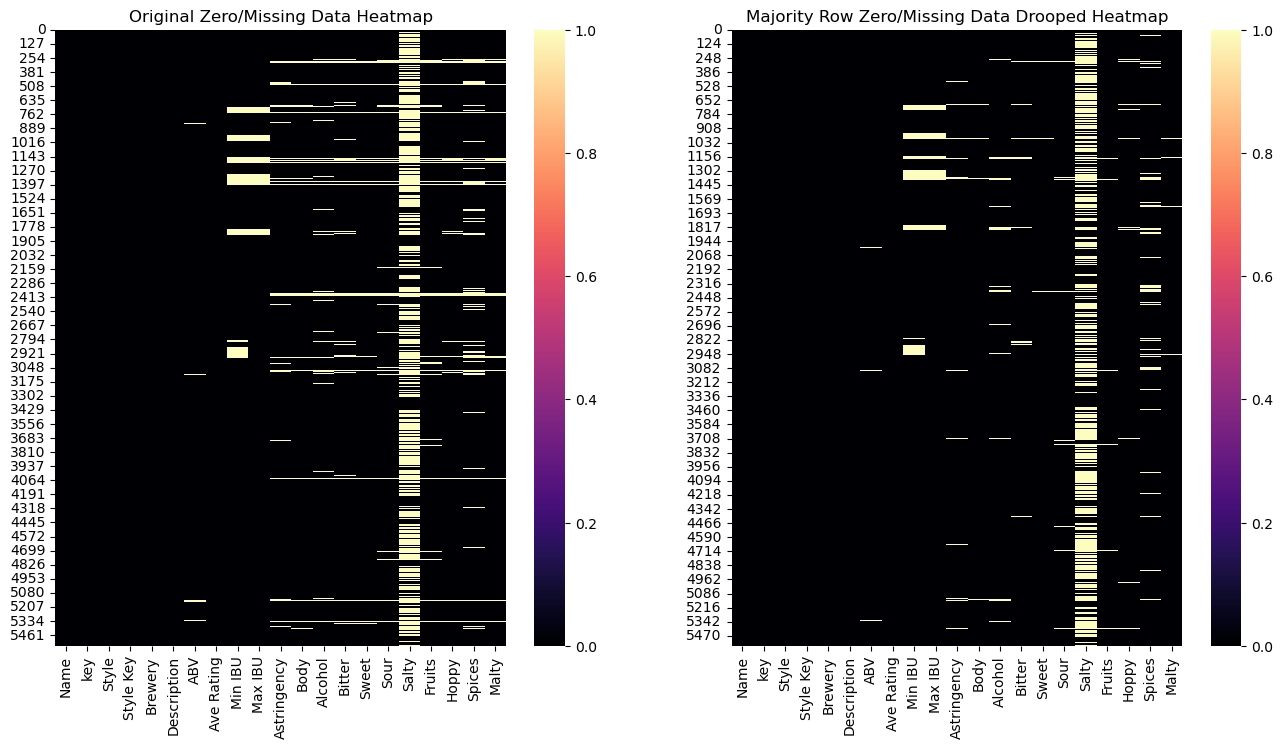

In [98]:
# Identify all data that = 0
# Drop out rows that have a majority of zeros
dfbr_zero = (dfbr == 0).astype(int)

dfbr_zero_count = (dfbr == 0).sum(axis=1)
dfbr_muti_zero = dfbr[dfbr_zero_count > 9]
# with pd.option_context("display.max_rows", None, 'display.max_columns', None):
#     print(dfbr_muti_zero)

dfbr_clean = dfbr[dfbr_zero_count <=9]
dfbr_clean.reset_index()
dfbr_zero_clean = (dfbr_clean == 0).astype(int)

fig, axs = plt.subplots(1, 2, figsize =(16, 8))

# plot 1
sns.heatmap(dfbr_zero, ax=axs[0], cmap='magma')
axs[0].set_title('Original Zero/Missing Data Heatmap')

# plot 2
sns.heatmap(dfbr_zero_clean, ax=axs[1], cmap='magma')
axs[1].set_title('Majority Row Zero/Missing Data Drooped Heatmap')

# salty has the most number of zeros in the graph but thats to be expected because beer is rarely salty
# We still have data that is missing that can be repaired located in AVB and IBU columns


In [99]:
# Check for data corelation to determine missingness type.

dfbr_working_imputation = dfbr_clean[['Style','ABV','Min IBU', 'Max IBU']]
dfbr_working_imputation_zeros = dfbr_working_imputation[(dfbr_working_imputation == 0).any(axis=1)]
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(dfbr_working_imputation_zeros)

# Data is not missing completely at random and is selecting for specific beer styles in terms of IBUs. Data missingness in this example is most likely MAR or MNAR.
# When IBUs = 0 then its a typical non-hoped or very sweet beer. Brett beer should have IBUs
# Doing some external research It dose appear data is missing and not 0, Also data is missing due to brewery not disclosing information. missing data dose not have any missing outside correlation in this case and can be repaired with what I have

                             Style    ABV  Min IBU  Max IBU
700                     Brett Beer   4.80        0        0
701                     Brett Beer   6.70        0        0
702                     Brett Beer   7.30        0        0
703                     Brett Beer   5.40        0        0
704                     Brett Beer   9.66        0        0
705                     Brett Beer   9.00        0        0
706                     Brett Beer   7.00        0        0
707                     Brett Beer   6.00        0        0
708                     Brett Beer   6.00        0        0
709                     Brett Beer   7.20        0        0
710                     Brett Beer   4.80        0        0
711                     Brett Beer   6.50        0        0
712                     Brett Beer   6.00        0        0
713                     Brett Beer   5.50        0        0
714                     Brett Beer   9.25        0        0
715                     Brett Beer   6.0

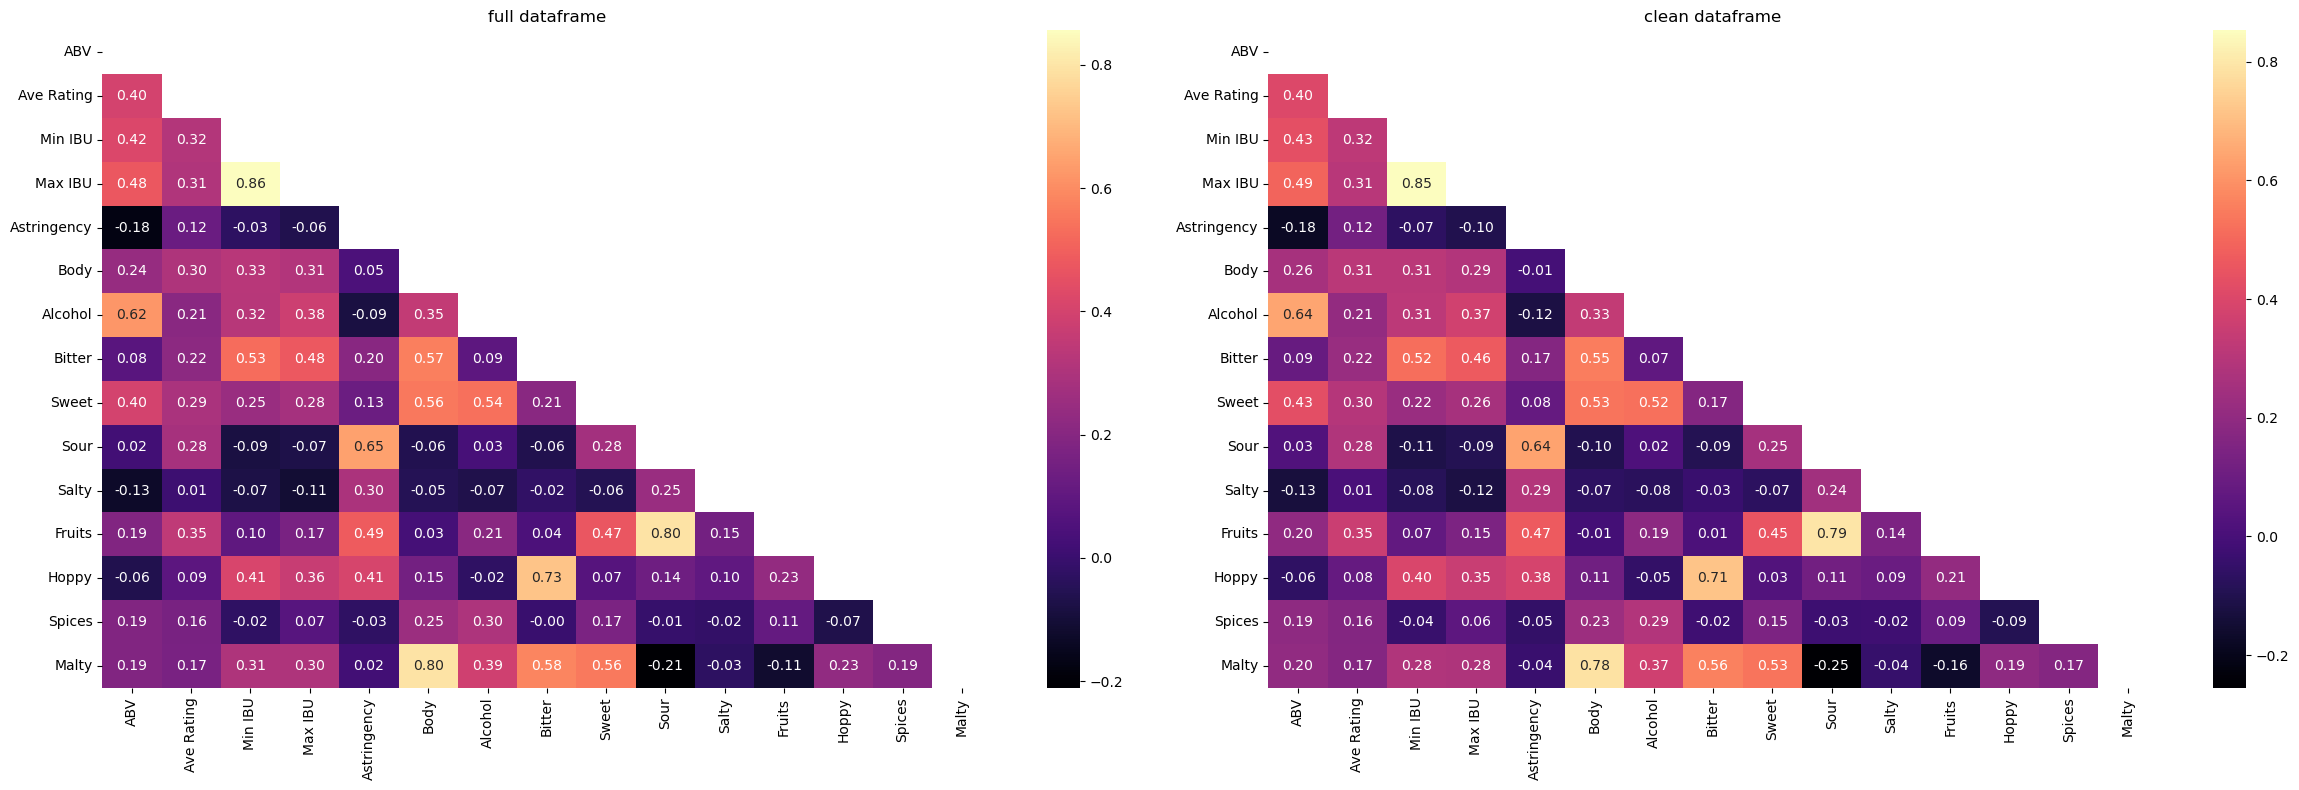

In [100]:
# check for correlations between column verbile to determine how to fix missing data
# correlation heat map with flavor profile indicators and average rating

dfbr_flavor_rating_corr = dfbr[['ABV', 'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']]
dfbr_flavor_rating_corr.corr()

dfbr_flavor_rating_corr_clean = dfbr_clean[['ABV', 'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']]
dfbr_flavor_rating_corr_clean.corr()

mask = np.triu(np.ones_like(dfbr_flavor_rating_corr.corr(), dtype=bool))

fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# no droped rows
sns.heatmap(dfbr_flavor_rating_corr.corr(),ax=axs[0], mask=mask, cmap='magma',annot=True, fmt=".2f")
axs[0].set_title('full dataframe')

# droped rows
sns.heatmap(dfbr_flavor_rating_corr_clean.corr(),ax=axs[1], mask=mask, cmap='magma',annot=True, fmt=".2f")
axs[1].set_title('clean dataframe')

plt.tight_layout()

plt.show()

## Notes on rating to flavor correlation ##
Over all, an increase in any flavor value gives an increase in rating. The all beer list of impotent rating flavors is.
1. ABV
2. Fruity
3. IBU
4. Body / thickness
5. Sweet
6. Sour
7. Apparent Bitterness
8. Apparent Alcohol taste
9. Malty
10. Spicy / warm
11. Astringent
12. Hoppy/Earthy
13. Salty
Something to keep in mind is the correlation assumes liner relationships. At some point I would expect any of the flavor to become so overpowering it lowers the rating of a beer. Here are some interning flavor correlations
* Positive correlations
1. Sour + fruity + Astringency
2. Malty + body + Bitter + Sweet + alcohol
3. Hoppy + Astringency + bitter
* Negitve correlations
1. (Salty + Astringency) + (ABV + IBU)
2.  malty + sour
Droping the rows with multiple zeros lowers most of the correlations by 0.02 or 2%. All correlations droping 2% make sense if you think 0 correlates with 0. The overall corelation patterns between the two charts dose not change

In [101]:
# due to a high number of corelating factors I believe MICE to be the best approach to fix missing data

# drop description for now since it only gets in the way.
dfbr_clean = dfbr_clean.drop(columns=['Description'])

In [102]:
# pull over the columns with data I am able to imputate into its own df
dfbr_working_imputation = dfbr_clean[['Name','Style','ABV','Min IBU', 'Max IBU']]
dfbr_working_imputation_zeros = dfbr_working_imputation[(dfbr_working_imputation == 0).any(axis=1)]

# Drop styles with Max IBUs listed with 0 min IBUs as the 0 dose not represent data that is missing
styles_to_exclude = ['Lambic - Faro', 'Lambic - Gueuze', 'Lambic - Traditional']
dfbr_working_imputation_zeros = dfbr_working_imputation_zeros[~dfbr_working_imputation_zeros['Style'].isin(styles_to_exclude)]
# dfbr_working_imputation_zeros.replace(0, np.nan, inplace = True)

# overlay the NA data onto the original df to use for MICE
for index in dfbr_working_imputation_zeros.index:
    dfbr_clean.loc[index, ['ABV','Min IBU', 'Max IBU']] = dfbr_clean.loc[index, ['ABV', 'Min IBU', 'Max IBU']].replace(0, np.nan)

# # Print df optional
# pd.set_option('display.expand_frame_repr', False )
# pd.set_option('display.max_colwidth', 1000)
# with pd.option_context('display.max_columns', None, 'display.max_rows', None):
#     print(dfbr_clean)
# # dfbr_clean is now ready to use for MICE imputation

C:\Users\jrruh\AppData\Local\Temp\ipykernel_13004\1029573280.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfbr_clean.loc[index, ['ABV','Min IBU', 'Max IBU']] = dfbr_clean.loc[index, ['ABV', 'Min IBU', 'Max IBU']].replace(0, np.nan)
C:\Users\jrruh\AppData\Local\Temp\ipykernel_13004\1029573280.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfbr_clean.loc[index, ['ABV','Min IBU', 'Max IBU']] = dfbr_clean.loc[index, ['ABV', 'Min IBU', 'Max IBU']].replace(0, np.nan)
C:\Users\jrruh\AppData\Local\Temp\ipykernel_13004\102957

MICE Imputation Results:
Mean Squared Error: 2.0185
R2 Score: 0.6575

Mean Imputation Results:
Mean Squared Error: 2.0523
R2 Score: 0.6518


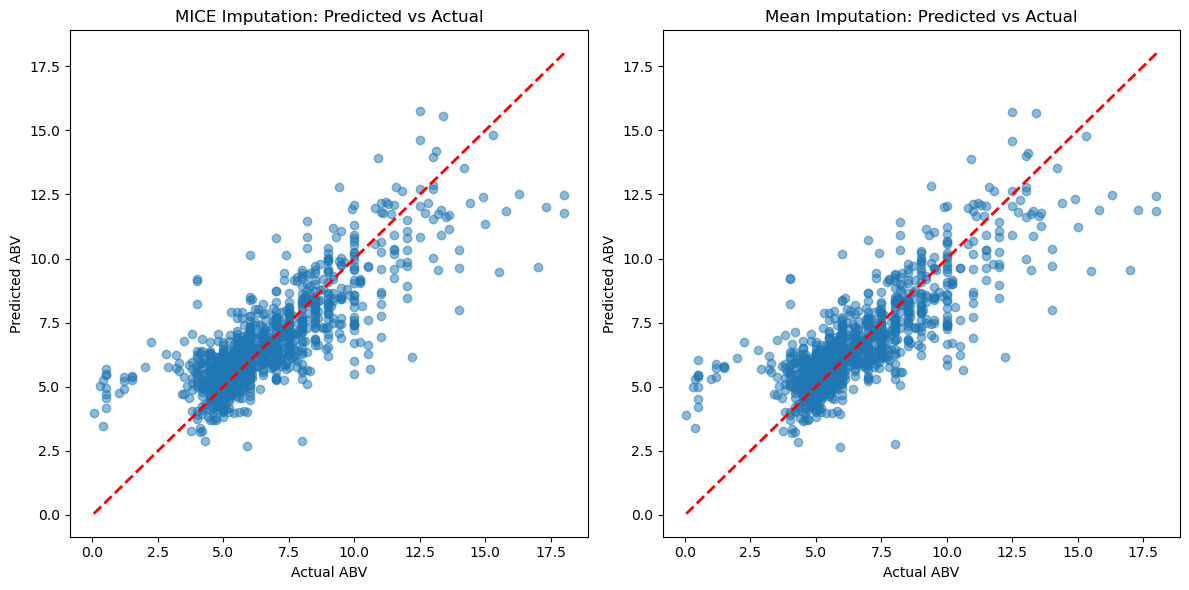


Feature Importances (MICE):
        feature  importance
5       Alcohol    0.908915
2       Max IBU    0.682687
13        Malty    0.611132
7         Sweet    0.554674
0    Ave Rating    0.547705
11        Hoppy    0.471506
3   Astringency    0.202435
6        Bitter    0.184723
10       Fruits    0.160957
1       Min IBU    0.135951
4          Body    0.049471
12       Spices    0.021699
9         Salty    0.011513
8          Sour    0.009119

Feature Importances (Mean):
        feature  importance
5       Alcohol    0.923702
2       Max IBU    0.665407
13        Malty    0.627085
0    Ave Rating    0.567517
7         Sweet    0.564913
11        Hoppy    0.442398
6        Bitter    0.211038
3   Astringency    0.207653
10       Fruits    0.150202
1       Min IBU    0.105584
4          Body    0.043952
12       Spices    0.017200
9         Salty    0.011696
8          Sour    0.006313

 MSE (MICE): 7.5269
 MSE (Mean): 7.7860


In [103]:
# rough visualization of MICE data imputation taken from ICA6 but substituted planets for my data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # this could be any ML method
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler

dfbr_clean

# Select columns for analysis
# columns_to_use = ['ABV', 'Alcohol', 'Max IBU', 'Sweet', 'Astringency', 'Ave Rating']
columns_to_use = ['ABV', 'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']
dfbr_MICE = dfbr_clean[columns_to_use].copy()

# Remove rows where orbital_period (our target) is NaN
dfbr_MICE = dfbr_MICE.dropna(subset=['ABV'])

# Log transform the target variable and relevant features
dfbr_MICE['log_ABV'] = np.log1p(dfbr_MICE['ABV'])
dfbr_MICE['log_Alcohol'] = np.log1p(dfbr_MICE['Alcohol'])
dfbr_MICE['log_Max IBU'] = np.log1p(dfbr_MICE['Max IBU'])
dfbr_MICE['log_Astringency'] = np.log1p(dfbr_MICE['Astringency'])
dfbr_MICE['log_Sweet'] = np.log1p(dfbr_MICE['Sweet'])

# Split features and target
# X = dfbr_MICE[['Alcohol', 'Max IBU', 'Sweet', 'Astringency', 'Ave Rating']]
X = dfbr_MICE[['Ave Rating', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']]
y = dfbr_MICE['ABV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RobustScaler instead of StandardScaler
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Perform MICE imputation
mice_imputer = IterativeImputer(random_state=42, max_iter=50)
X_train_mice = pd.DataFrame(mice_imputer.fit_transform(X_train_scaled), 
                            columns=X_train.columns, index=X_train.index)
X_test_mice = pd.DataFrame(mice_imputer.transform(X_test_scaled), 
                           columns=X_test.columns, index=X_test.index)

# Train a linear regression model on the MICE imputed data
lr_mice = LinearRegression()
lr_mice.fit(X_train_mice, y_train)

# Make predictions and calculate MSE and R2
y_pred_mice = lr_mice.predict(X_test_mice)
mse_mice = mean_squared_error(y_test, y_pred_mice)
r2_mice = r2_score(y_test, y_pred_mice)

print(f"MICE Imputation Results:")
print(f"Mean Squared Error: {mse_mice:.4f}")
print(f"R2 Score: {r2_mice:.4f}")

# Compare with simple mean imputation
mean_imputer = SimpleImputer(strategy='mean')
X_train_mean = pd.DataFrame(mean_imputer.fit_transform(X_train_scaled), 
                            columns=X_train.columns, index=X_train.index)
X_test_mean = pd.DataFrame(mean_imputer.transform(X_test_scaled), 
                           columns=X_test.columns, index=X_test.index)

lr_mean = LinearRegression()
lr_mean.fit(X_train_mean, y_train)
y_pred_mean = lr_mean.predict(X_test_mean)
mse_mean = mean_squared_error(y_test, y_pred_mean)
r2_mean = r2_score(y_test, y_pred_mean)

print(f"\nMean Imputation Results:")
print(f"Mean Squared Error: {mse_mean:.4f}")
print(f"R2 Score: {r2_mean:.4f}")

# Visualize the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_mice, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual ABV')
plt.ylabel('Predicted ABV')
plt.title('MICE Imputation: Predicted vs Actual')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_mean, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual ABV')
plt.ylabel('Predicted ABV')
plt.title('Mean Imputation: Predicted vs Actual')

plt.tight_layout()
plt.show()

# Print feature importances (coefficients for linear regression)
feature_importance_mice = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(lr_mice.coef_)})
feature_importance_mice = feature_importance_mice.sort_values('importance', ascending=False)
print("\nFeature Importances (MICE):")
print(feature_importance_mice)

feature_importance_mean = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(lr_mean.coef_)})
feature_importance_mean = feature_importance_mean.sort_values('importance', ascending=False)
print("\nFeature Importances (Mean):")
print(feature_importance_mean)

# Calculate and print exponentiated MSE for interpretability
print(f"\n MSE (MICE): {np.exp(mse_mice):.4f}")
print(f" MSE (Mean): {np.exp(mse_mean):.4f}")
# print(y)

In [104]:
# Chat GPT4 (10/8/2024) suggested using the Fancyimpute Iterative imputer for MICE
from fancyimpute import IterativeImputer  # Import the MICE algorithm

# Sample original DataFrame with missing values

columns_to_use = ['ABV', 'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']
dfbr_MICE = dfbr_clean[columns_to_use].copy()
# Display original DataFrame
print("Original DataFrame:")
print(dfbr_MICE)

# Create a working copy for imputation
dfbr_imputation = dfbr_MICE.copy()

# Instantiate the MICE imputer
imputer = IterativeImputer()

# Perform MICE imputation on the df
dfbr_imputed = pd.DataFrame(imputer.fit_transform(dfbr_imputation), columns=dfbr_imputation.columns)

# Print Optional
# pd.set_option('display.expand_frame_repr', False )
# pd.set_option('display.max_colwidth', 1000)
# with pd.option_context('display.max_columns', None, 'display.max_rows', None):
#     print(df_imputed[['ABV', 'Min IBU', 'Max IBU']])

# I checked a few of the columns and they seam to have imputed close to what I expect the actual value to be which is good

Original DataFrame:
      ABV  Ave Rating  Min IBU  Max IBU  Astringency  Body  Alcohol  Bitter  \
0     5.3        3.65     25.0     50.0           13    32        9      47   
1     7.2        3.90     25.0     50.0           12    57       18      33   
2     5.0        3.58     25.0     50.0           14    37        6      42   
3     8.5        4.15     25.0     50.0           13    55       31      47   
4     5.3        3.67     25.0     50.0           21    69       10      63   
...   ...         ...      ...      ...          ...   ...      ...     ...   
5553  6.8        3.59     35.0     50.0            8    44       24      19   
5554  6.9        3.79     35.0     50.0           22    73        9      58   
5555  7.5        3.76     35.0     50.0           11    36       50      70   
5556  8.0        3.61     35.0     50.0            6    64       30      57   
5557  8.6        3.89     35.0     50.0            8    50       49      13   

      Sweet  Sour  Salty  Fruit

In [105]:
# Transfer the imputed data onto the clean df
dfbr_clean.reset_index(drop=True, inplace=True)
dfbr_imputed.reset_index(drop=True, inplace=True)
for index in dfbr_clean.index:
    dfbr_clean.loc[index, ['ABV','Min IBU', 'Max IBU']] = dfbr_imputed.loc[index, ['ABV', 'Min IBU', 'Max IBU']]

Text(0.5, 1.0, 'Imputed Zero/Missing Data Heatmap')

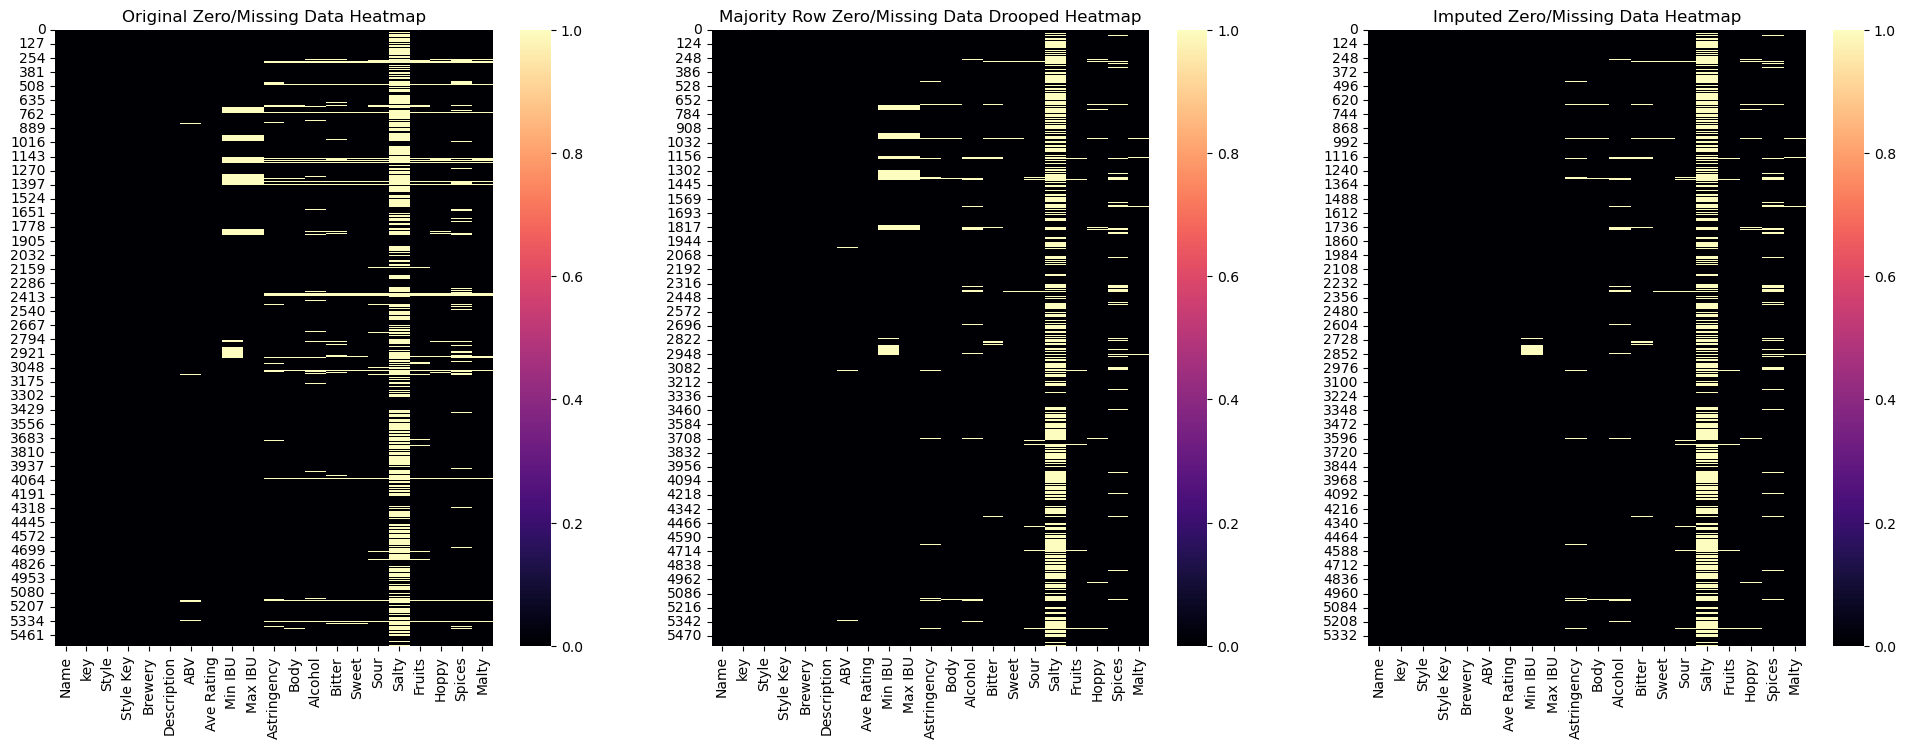

In [106]:
# new look at the zero heatmap with data imputed
dfbr_clean_heatmap = (dfbr_clean == 0).astype(int)

fig, axs = plt.subplots(1, 3, figsize =(24, 8))

# plot 1
sns.heatmap(dfbr_zero, ax=axs[0], cmap='magma')
axs[0].set_title('Original Zero/Missing Data Heatmap')

# plot 2
sns.heatmap(dfbr_zero_clean, ax=axs[1], cmap='magma')
axs[1].set_title('Majority Row Zero/Missing Data Drooped Heatmap')

sns.heatmap(dfbr_clean_heatmap, ax=axs[2], cmap='magma')
axs[2].set_title('Imputed Zero/Missing Data Heatmap')

Missingness information for home brew data

BeerID               0
Name                 2
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67101
PrimingAmount    69087
UserId           50490
dtype: int64


Text(170.72222222222223, 0.5, 'Features')

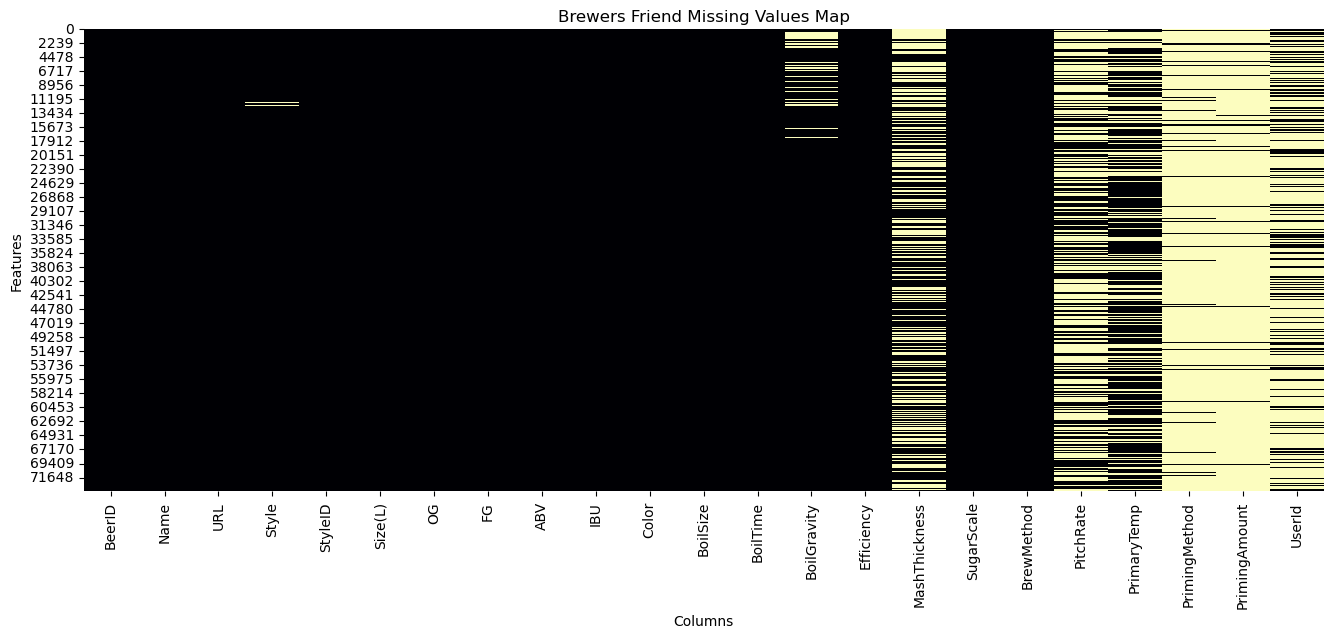

In [107]:
dfbf_temp = dfbf.drop(['BrewMethod_Encode', 'SugarScale_Encode'], axis=1)

# from dfbf call all null values and add them up
dfbfnull = dfbf_temp.isnull().sum()
print(dfbfnull)
# Heatmap missing values
# from dfbf call all not na values as integers
dfbf_null_graph = dfbf_temp.notna().astype(int)

# df_null_graph
plt.figure(figsize=(16,6))
sns.heatmap(dfbf_null_graph, cmap="magma_r", cbar=False)
plt.title('Brewers Friend Missing Values Map')
plt.xlabel('Columns')
plt.ylabel('Features')

              BeerID      Name URL     Style StyleID Size(L) OG FG ABV IBU  \
BeerID                                                                       
Name                       1.0     -0.000469                                 
URL                                                                          
Style                -0.000469           1.0                                 
StyleID                                                                      
Size(L)                                                                      
OG                                                                           
FG                                                                           
ABV                                                                          
IBU                                                                          
Color                                                                        
BoilSize                                                        

<Axes: >

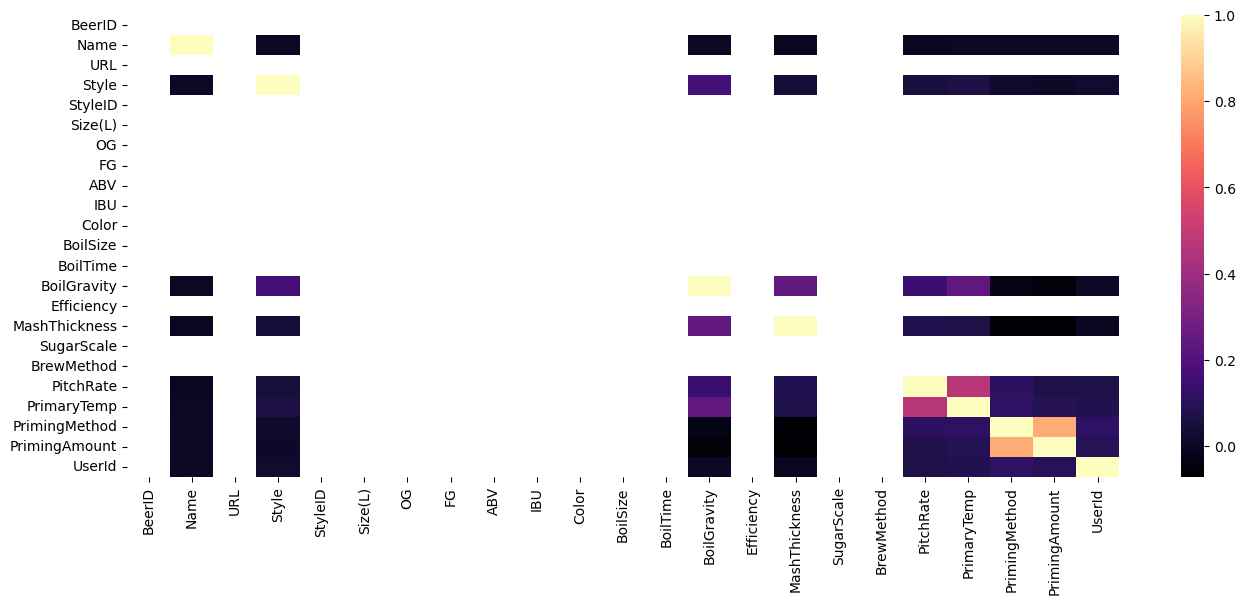

In [108]:
# checking for missing randomness/ correlations in homebrew data
print(dfbf_null_graph.corr().fillna(''))
plt.figure(figsize=(16,6))
sns.heatmap(dfbf_null_graph.corr(), cmap='magma')

I will not use all of the information from the homebrew df, I just want a fraction of the data. the data I want is all present so no cleaning is required
* Current list of transfer data from homebrew
1. OG
2. FG
3. AVB
4. IBU
5. Color

## Data Frame Merge ##
* Add beer color data from the homebrew df to the beer rank df

In [109]:
# df1
dfbr
# only show Style and Style Key
dfbr_styleID = dfbr[['Style','Style Key']].drop_duplicates()
dfbr_styleID
# rename style in dfbr as style 1 for clarity
dfbr_styleID.rename(columns={'Style': 'Style_1'}, inplace=True)
# drop Na
dfbr_styleID = dfbr_styleID.dropna()

# df2
dfbf

dfbf_styleID = dfbf[['Style','StyleID']].drop_duplicates()
# rename style in dfbf as style 2 for clarity
dfbf_styleID.rename(columns={'Style': 'Style_2'}, inplace=True)
# drop Na
dfbf_styleID = dfbf_styleID.dropna()

In [110]:
import re
# Clean up and organize the style information
def clean_and_sort(styles):
    # Remove special characters and split into words
    words = re.sub(r'[^a-zA-Z\s]', '', styles).split()
    # Sort words alphabetically and join them back
    return ' '.join(sorted(words))
dfbr_styleID['Style_1'] = dfbr_styleID['Style_1'].apply(clean_and_sort)
dfbf_styleID['Style_2'] = dfbf_styleID['Style_2'].apply(clean_and_sort)

In [111]:
from fuzzywuzzy import process

def get_best_match(style, choices):
    try:
        match = process.extractOne(style, choices)
        return match  # Returns (best_match, score)
    except Exception as e:
        print(f"Error processing style '{style}': {e}")
        return None, 0  # Return None and score 0 on error

# Create a new DataFrame to hold the matches
matches = []

# Iterate over each style in dfbr_styleID
for index, row in dfbr_styleID.iterrows():
    best_match = get_best_match(row['Style_1'], dfbf_styleID['Style_2'])
    
    if best_match:
        match_style = best_match[0]
        score = best_match[1]
        
        # Find the corresponding StyleID from dfbf_styleID based on the match
        corresponding_row = dfbf_styleID[dfbf_styleID['Style_2'] == match_style]
        
        if not corresponding_row.empty:
            style_id = corresponding_row.iloc[0]['StyleID']
        else:
            style_id = None  # If no corresponding row is found
        
        matches.append({
            'Style_1': row['Style_1'],
            'Style_Key': row['Style Key'],
            'Best_Match_Style_2': match_style,
            'Best_Match_StyleID': style_id,
            'Score': score
        })
# Create a DataFrame from the matches
matches_df = pd.DataFrame(matches)

In [112]:
# The original string match alignment was 60% successful at paring the correct style information from the two df
# manually check and change some of the alignment parings around so the transfer information is correct
# list of changes 'Ale Belgian Brown Dark' ->
# The original alignment was 60% successful at paring the correct style information from the two df
# manually check and change some of the alignment parings around so the transfer information is correct
# list of changes 'Ale Belgian Brown Dark' ->
matches_df['Best_Match_StyleID'] = matches_df['Best_Match_StyleID'].astype(int)
changes ={
    'Ale Belgian Brown Dark' : 21,
    'Ale Brown English' : 34,
    'Ale Dark English Mild' : 53,
    'Amber American Lager Red' : 4,
    'Dark European Lager' : 89,
    'Lager Mrzen Oktoberfest' : 115,
    'Bire Bire Brut Champagne de' : 145,
    'Ale Black Cascadian Dark IPA' : 148,
    'Brut IPA' : 65,
    'England IPA New' : 65,
    'Bitter English' : 157,
    'Bitter Bitter ESB English Extra Special Strong' : 68,
    'Ale American Blonde' : 30,
    'Ale Bire Farmhouse Garde de' : 145,
    'Ale English Mild Pale' : 105,
    'Ale English Pale' : 49,
    'Adjunct Lager' : 9,
    'Dortmunder European Export Lager' : 55,
    'European Lager Pale' : 90,
    'European Lager Strong' : 23,
    'IPL India Lager Lager Pale' : 7,
    'Kellerbier Lager Zwickelbier' : 96,
    'Lager Liquor Malt' : 124,
    'Imperial Pilsner' : 23,
    'Beer Chile' : 90,
    'Beer Field Fruit and' : 146,
    'Ale Ancient Gruit Herbed' : 155,
    'Happoshu': 100,
    'Beer Herb Spice and': 155,
    'Kvass' : 155,
    'Japanese Lager Rice' : 100,
    'Alcohol Beer Low' : 100, 
    'Beer Pumpkin': 155,
    'Beer Rye' : 15,
    'American Imperial Stout' : 87,
    'English Stout' : 93,
    'Quad Quadrupel' : 132,
    'Ale Imperial Red' : 150,
    'Ale Heavy Scotch Wee' : 160,
    'Ale English Strong' : 36,
    'American Beer Dark Wheat' : 52,
    'American Beer Pale Wheat' : 14,
    'Beer Hefeweizen Wheat' : 175,
    'Beer Kristallweizen Wheat' : 175,
    'Ale Wild' : 173
}
for style, new_value in changes.items():
    matches_df.loc[matches_df['Style_1'] == style, 'Best_Match_StyleID'] = new_value
# pd.set_option('display.expand_frame_repr', False )
# pd.set_option('display.max_colwidth', 1000)
# with pd.option_context('display.max_columns', None, 'display.max_rows', None):
#     print(matches_df)

In [113]:
# Create a transfer version of the home brew data with only potently reinvent information

transfer_df = dfbf[['Style', 'StyleID', 'OG', 'FG', 'ABV', 'IBU', 'Color']]
Color_Style_Mean = transfer_df.groupby('Style')['Color'].agg(['mean','var']).reset_index()
Color_Style_Mean.rename(columns={'mean':'Style Color Mean','var':'Style Color Var'}, inplace=True)
transfer_df = transfer_df.merge(Color_Style_Mean, on='Style', how ='left')
# with pd.option_context('display.max_rows', None):
#     print(transfer_df[['Style','Color','Style Color Var']])
# ChatGPT 4 (10/3/2024) helped show me a more efficient way of amending new column information to a df
Mean_Gravity = transfer_df.groupby('Style')[['OG', 'FG', 'ABV','IBU']].agg(['mean','var']).reset_index()
Mean_Gravity.columns = ['Style', 
                        'Style OG Mean', 'Style OG Var', 
                        'Style FG Mean', 'Style FG Var', 
                        'Style ABV Mean', 'Style ABV Var', 
                        'Style IBU Mean', 'Style IBU Var']
transfer_df = transfer_df.merge(Mean_Gravity, on='Style', how='left')
transfer_df = transfer_df.drop(['OG', 'FG', 'ABV', 'IBU', 'Color'], axis=1)
transfer_df = transfer_df.drop_duplicates().reset_index()
# with pd.option_context('display.max_columns', None, 'display.max_rows', None):
#     print(transfer_df)

In [114]:
# complete the merge
merged_with_df1 = pd.merge(matches_df, dfbr_clean, 
                            left_on='Style_Key', 
                            right_on='Style Key', 
                            how='left')
# Step 2: Merge the result with df2 (dfbf) on Best_Match_StyleID and StyleID
final_merged_df = pd.merge(merged_with_df1, transfer_df, 
                            left_on='Best_Match_StyleID', 
                            right_on='StyleID', 
                            how='left')
# drop repeated column information
columns_to_drop = ['Best_Match_Style_2', 'Best_Match_StyleID', 'Score', 'Style_1', 'Style_Key', 'key']
final_merged_df = final_merged_df.drop(columns=columns_to_drop)
# final_merged_df = final_merged_df.rename(columns={})
final_merged_df

,Name,Style_x,Style Key,Brewery,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,...,Style Color Mean,Style Color Var,Style OG Mean,Style OG Var,Style FG Mean,Style FG Var,Style ABV Mean,Style ABV Var,Style IBU Mean,Style IBU Var
0,Amber,Altbier,8,Alaskan Brewing Co.,5.3,3.65,25.0,50.0,13,32,...,13.985839,11.802602,1.050707,0.000045,1.011855,0.000008,5.104161,0.487998,39.141460,201.344771
1,Double Bag,Altbier,8,Long Trail Brewing Co.,7.2,3.90,25.0,50.0,12,57,...,13.985839,11.802602,1.050707,0.000045,1.011855,0.000008,5.104161,0.487998,39.141460,201.344771
2,Long Trail Ale,Altbier,8,Long Trail Brewing Co.,5.0,3.58,25.0,50.0,14,37,...,13.985839,11.802602,1.050707,0.000045,1.011855,0.000008,5.104161,0.487998,39.141460,201.344771
3,Doppelsticke,Altbier,8,Uerige Obergärige Hausbrauerei,8.5,4.15,25.0,50.0,13,55,...,13.985839,11.802602,1.050707,0.000045,1.011855,0.000008,5.104161,0.487998,39.141460,201.344771
4,Scurry,Altbier,8,Off Color Brewing,5.3,3.67,25.0,50.0,21,69,...,13.985839,11.802602,1.050707,0.000045,1.011855,0.000008,5.104161,0.487998,39.141460,201.344771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415,Red Nose Winter Ale,Winter Warmer,17,Natty Greene's Pub & Brewing Co.,6.8,3.59,35.0,50.0,8,44,...,22.098516,101.993840,1.069684,0.000208,1.016613,0.000024,6.973161,2.273675,37.028774,384.474506
5416,Our Special Ale 2019 (Anchor Christmas Ale),Winter Warmer,17,Anchor Brewing Company,6.9,3.79,35.0,50.0,22,73,...,22.098516,101.993840,1.069684,0.000208,1.016613,0.000024,6.973161,2.273675,37.028774,384.474506
5417,Fish Tale Winterfish,Winter Warmer,17,Fish Brewing Company / Fishbowl Brewpub,7.5,3.76,35.0,50.0,11,36,...,22.098516,101.993840,1.069684,0.000208,1.016613,0.000024,6.973161,2.273675,37.028774,384.474506
5418,"He'Brew Hanukkah, Chanukah: Pass The Beer",Winter Warmer,17,Shmaltz Brewing Company,8.0,3.61,35.0,50.0,6,64,...,22.098516,101.993840,1.069684,0.000208,1.016613,0.000024,6.973161,2.273675,37.028774,384.474506


In [115]:
# Save merged df to be used for EDA
# final_merged_df.to_csv('Merged_Beer_DF', index=False)

## Outlier detection ###
* Outliers in both datasets are expected as every beer maker likes to experiment and sell beer thats different from there competitors. I will not be taking out any Outliers in each data set, however it is interesting to look at what some mad brewers are making in the home brew data

Outliers
 Size(L)           887
OG                 33
FG                 58
ABV               865
IBU               774
Color            1657
BoilSize          861
BoilTime         1558
BoilGravity         0
Efficiency        244
MashThickness       0
PitchRate           0
PrimaryTemp         0
dtype: int64


Text(170.72222222222223, 0.5, 'rows')

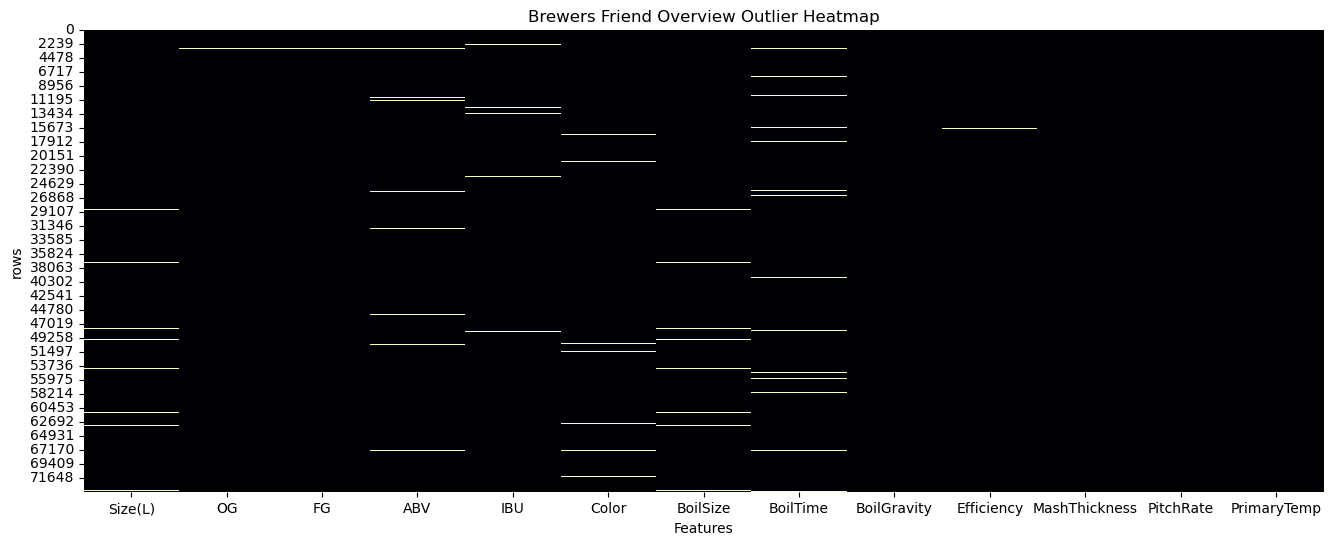

In [116]:
# Find outliers using standard distribution
numerical_dfbf = dfbf_temp.select_dtypes(include='number')
numerical_dfbf = numerical_dfbf.drop(['BeerID','StyleID','UserId'], axis= 1)
df_scaled = numerical_dfbf.apply(zscore)
outliers = (df_scaled.abs()>3).sum()
print('Outliers\n',outliers)
outlier_map = (df_scaled.abs() > 3)

# plot outliers
plt.figure( figsize= (16,6))
sns.heatmap(outlier_map, cmap="magma", cbar=False)
plt.title('Brewers Friend Overview Outlier Heatmap')
plt.xlabel('Features')
plt.ylabel('rows')

Outliers marked are beers with extreme property. Not all outlier or strange beer can be found with this kind of data structure as more variables are needed to find all strange beer in the home brew data set. Spending some time looking into the outliers show they are often described as imperial style beers, one of which has ABV 54.72% and IBU 3409.3, A truly vile concoction.